In [76]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [77]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [78]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [79]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [80]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [81]:
# View all of the classes that automap found
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [82]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [83]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [84]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [85]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
start_date = '2015-07-01'
end_date = '2015-07-28'

def calc_temp(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
year_calctemp = calc_temp(start_date, end_date)
min_temp = year_calctemp[0][0]
avg_temp = year_calctemp[0][1]
max_temp = year_calctemp[0][2]

print(year_calctemp)

[(67.0, 77.43975903614458, 84.0)]


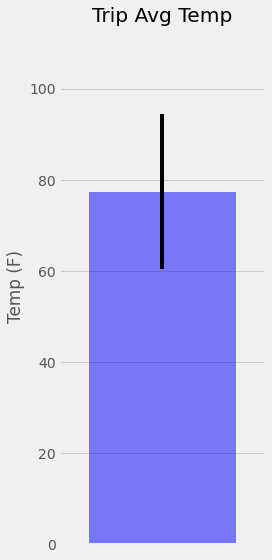

In [86]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=plt.figaspect(2.))
bar= ax.bar(1, avg_temp, yerr=(max_temp-min_temp),alpha=0.5, color="blue")
ax.set(xticks=range(1), xticklabels="a", title="Trip Avg Temp", ylabel = "Temp (F)")
ax.margins(.2,.2)
fig.tight_layout()


plt.show()

# error = year_calctemp_df["max_temp"] - year_calctemp_df["min_temp"]
# tick_loc = [value for value in x_axis]

# plt.bar(x_axis,year_calctemp_df.avg_temp, color='xkcd:teal blue', alpha=0.3, width=0.1,align="center",yerr=error)
# plt.figure(figsize=(4,8))
# plt.bar(x_axis,year_calctemp_df.avg_temp, yerr=error,alpha=0.75, color="green")
# plt.title(f"Trip Avg Temp for Dates\n {start_date} to {end_date}")
# plt.ylabel("Temp (F)")
# plt.xlabel(f'From {start_date} To {end_date}')

### Daily Rainfall Average

In [87]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [93]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [94]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = dt.date(2015,7,1)
end_date = dt.date(2015,7,28)

# Use the start and end date to create a range of dates
date_range = pd.date_range(start_date, end_date)

# Strip off the year and save a list of strings in the format %m-%d
dates_mmdd = date_range.strftime("%m"-"%d")

# # # Use the `daily_normals` function to calculate the normals for each date string 
# # # and append the results to a list called `normals`.
normal_list = []
for trip_date in dates_mmdd:
    normal_list.append(*daily_normals(trip_date))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [95]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normal_df = pd.DataFrame(normal_list, columns=["min_temp", "avg_temp", "max_temp"])

# make trip_dates the index
daily_normal_df['Date'] = date_range
daily_normal_df = daily_normal_df.set_index("Date")


NameError: name 'normal_list' is not defined

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session